In [44]:
import pandas as pd
import numpy as np

In [45]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [46]:
%precision 3

'%.3f'

In [47]:
pd.set_option('precision', 3)

# #1 엔씨소프트 주가에 대한 검색량 증가한 기간에 엔씨소프트 주가의 변동이 심할 것이다.</br>

엔씨소프트 주가의 변동이 예상되는 상황에 주가 검색량이 높을 것이다.


# #2 리니지 계정 거래 검색량이 증가한 기간에 엔씨소프트 주가의 변동이 심할 것이다.</br>

리니지 계정 거래가 많다는 것은 엔씨소프트의 주력 게임 리니지를 접는 사람이나 플레이하고 싶어하는 사람이 증가한다는 것이므로 주가에 변동이 클 것이다.


# #3 리니지 BM에 대한 검색량이 증가한 기간에 엔씨소프트의 주가가 하락할 것이다.</br>

리니지식 BM은 게임 BM 중에서도 악명이 높기 때문에 이에 대한 관심이 높아지는 상황에 주가가 떨어질 것이다.

In [48]:
data = '/gdrive/My Drive/BD/NC/data.csv'

In [49]:
df = pd.read_csv(data)

In [50]:
df = df.drop(['stock_price'], axis=1)
df.head()

,date,search_stock_price,search_trade_linege_account,search_linege_bm,stock_price(/10000)
0,2021-03-21,4,18,0,93.2
1,2021-03-28,23,0,29,83.4
2,2021-04-04,12,37,0,88.5
3,2021-04-11,10,19,0,90.6
4,2021-04-18,9,37,0,89.4


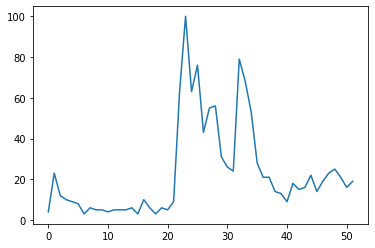

In [51]:
df['search_stock_price'].plot()

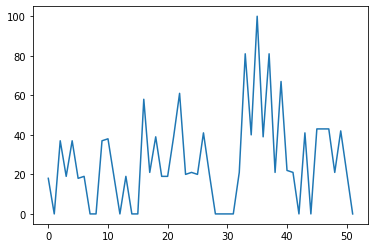

In [52]:
df['search_trade_linege_account'].plot()

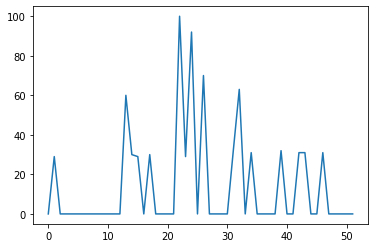

In [53]:
df['search_linege_bm'].plot()

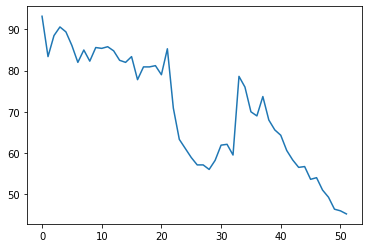

In [54]:
df['stock_price(/10000)'].plot()

## #1

In [55]:
df1 = df.drop(['search_trade_linege_account', 'search_linege_bm'], axis=1)
df1.head()

,date,search_stock_price,stock_price(/10000)
0,2021-03-21,4,93.2
1,2021-03-28,23,83.4
2,2021-04-04,12,88.5
3,2021-04-11,10,90.6
4,2021-04-18,9,89.4


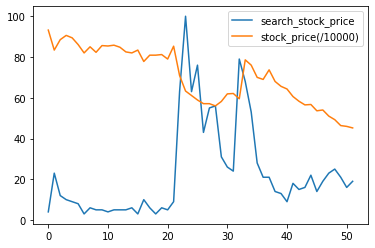

In [56]:
df1.plot()

In [57]:
df1[21:37] # '엔씨 주가' 검색량 폭증 기간 설정

,date,search_stock_price,stock_price(/10000)
21,2021-08-15,9,85.3
22,2021-08-22,63,70.9
23,2021-08-29,100,63.3
24,2021-09-05,63,61.1
25,2021-09-12,76,58.9
26,2021-09-19,43,57.1
27,2021-09-26,55,57.1
28,2021-10-03,56,56.0
29,2021-10-10,31,58.2
30,2021-10-17,26,61.9


In [58]:
df1.describe()

,search_stock_price,stock_price(/10000)
count,52.000,52.000
mean,23.135,70.459
std,23.180,13.852
min,3.000,45.200
25%,6.000,58.275
50%,15.500,70.450
75%,25.250,82.725
max,100.000,93.200


In [59]:
df1[21:37].describe()  # 엔씨 주가 검색량이 폭발적으로 증가한 시기

,search_stock_price,stock_price(/10000)
count,16.000,16.000
mean,49.688,65.312
std,25.054,8.748
min,9.000,56.000
25%,27.500,58.725
50%,54.000,62.000
75%,64.250,70.225
max,100.000,85.300


In [60]:
df1[:21].describe()  # 엔씨 주가 검색량이 미미하던 시기

,search_stock_price,stock_price(/10000)
count,21.000,21.000
mean,6.810,84.276
std,4.457,3.835
min,3.000,77.800
25%,5.000,82.000
50%,5.000,83.400
75%,8.000,85.800
max,23.000,93.200


In [61]:
df1[37:].describe()  # 엔씨 주가 검색량이 하락했지만 폭등 이전보다는 높음

,search_stock_price,stock_price(/10000)
count,15.000,15.000
mean,17.667,56.603
std,4.337,8.582
min,9.000,45.200
25%,14.500,50.125
50%,18.000,56.500
75%,21.000,62.450
max,25.000,73.700



'엔씨 주가' 검색량이 증가하기 이전 기간의 표준 편차 : 3.835 (38,350)  </br>(검색량 평균 6.810 회)

---

'엔씨 주가' 검색량이 증가한 기간의 표준 편차 : 8.748 (87,480)  </br>(검색량 평균 49.688 회)

---

'엔씨 주가' 검색량이 증가한 후 기간의 표준 편차 : 8.582 (85,820)  </br>(검색량 평균 17.677 회)

엔씨 주가에 대한 검색이 늘어날 때 엔씨 주가 변동 폭이 크다는 것을 알 수 있다.

## #2

In [62]:
df2 = df.drop(['search_stock_price', 'search_linege_bm'], axis=1)
df2.head()

,date,search_trade_linege_account,stock_price(/10000)
0,2021-03-21,18,93.2
1,2021-03-28,0,83.4
2,2021-04-04,37,88.5
3,2021-04-11,19,90.6
4,2021-04-18,37,89.4


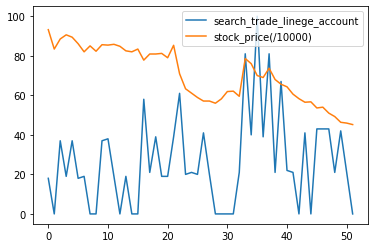

In [63]:
df2.plot()

In [64]:
df2.describe()

,search_trade_linege_account,stock_price(/10000)
count,52.000,52.000
mean,26.654,70.459
std,23.316,13.852
min,0.000,45.200
25%,13.500,58.275
50%,21.000,70.450
75%,39.250,82.725
max,100.000,93.200


In [65]:
df2[:12].describe()

,search_trade_linege_account,stock_price(/10000)
count,12.000,12.000
mean,20.167,86.442
std,14.776,3.391
min,0.000,82.000
25%,13.500,84.600
50%,19.000,85.700
75%,37.000,88.725
max,38.000,93.200


In [66]:
df2[12:24].describe()

,search_trade_linege_account,stock_price(/10000)
count,12.000,12.000
mean,24.583,79.333
std,20.887,6.312
min,0.000,63.300
25%,14.250,78.700
50%,19.500,81.050
75%,39.000,82.725
max,61.000,85.300


In [67]:
df2[24:36].describe()

,search_trade_linege_account,stock_price(/10000)
count,12.000,12.000
mean,28.667,63.042
std,32.561,7.614
min,0.000,56.000
25%,0.000,57.925
50%,20.500,60.300
75%,40.250,64.075
max,100.000,78.600


In [68]:
df2[36:48].describe()

,search_trade_linege_account,stock_price(/10000)
count,12.000,12.000
mean,35.083,60.942
std,24.111,7.111
min,0.000,51.000
25%,21.000,55.875
50%,40.000,59.450
75%,43.000,66.200
max,81.000,73.700


~12 주</br>
계정거래 검색량 평균 = 20.167</br>
엔씨소프트 주가 표준편차 = 3.391 (33,910)</br>

---

12~24 주</br>
계정거래 검색량 평균 = 24.583</br>
엔씨소프트 주가 표준편차 = 6.312 (63,120)</br>
<검색량 평균 증가, 주가 표준편차 증가>

---

24~36</br>
계정거래 검색량 평균 = 28.667</br>
엔씨소프트 주가 표준편차 = 7.614 (76,140)</br>
<검색량 평균 증가, 주가 표준편차 증가>

---

36~48 주</br>
계정거래 검색량 평균 = 35.083</br>
엔씨소프트 주가 표준편차 = 7.111 (71,110)</br>
<검색량 평균 증가, 주가 표준편차 감소>


계정거래 검색량 증가와 엔씨소프트 주가 변동의 증가가 일치하진 않지만 어느정도 비슷하게 흘러가는 양상을 띈다.

## #3

In [69]:
df3 = df.drop(['search_stock_price', 'search_trade_linege_account'], axis=1)
df3.head()

,date,search_linege_bm,stock_price(/10000)
0,2021-03-21,0,93.2
1,2021-03-28,29,83.4
2,2021-04-04,0,88.5
3,2021-04-11,0,90.6
4,2021-04-18,0,89.4


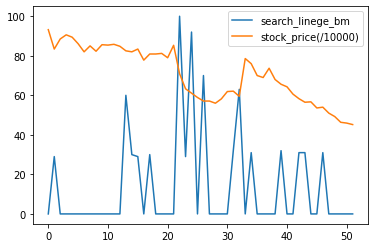

In [70]:
df3.plot()

In [71]:
df3.describe()

,search_linege_bm,stock_price(/10000)
count,52.000,52.000
mean,13.846,70.459
std,24.725,13.852
min,0.000,45.200
25%,0.000,58.275
50%,0.000,70.450
75%,29.250,82.725
max,100.000,93.200


In [72]:
df3[:12].describe()

,search_linege_bm,stock_price(/10000)
count,12.000,12.000
mean,2.417,86.442
std,8.372,3.391
min,0.000,82.000
25%,0.000,84.600
50%,0.000,85.700
75%,0.000,88.725
max,29.000,93.200


In [76]:
df3[12:24].describe()

,search_linege_bm,stock_price(/10000)
count,12.000,12.000
mean,23.167,79.333
std,31.103,6.312
min,0.000,63.300
25%,0.000,78.700
50%,14.500,81.050
75%,30.000,82.725
max,100.000,85.300


In [77]:
df3[24:36].describe()

,search_linege_bm,stock_price(/10000)
count,12.000,12.000
mean,24.000,63.042
std,33.583,7.614
min,0.000,56.000
25%,0.000,57.925
50%,0.000,60.300
75%,39.750,64.075
max,92.000,78.600


In [78]:
df3[36:48].describe()

,search_linege_bm,stock_price(/10000)
count,12.000,12.000
mean,10.417,60.942
std,15.389,7.111
min,0.000,51.000
25%,0.000,55.875
50%,0.000,59.450
75%,31.000,66.200
max,32.000,73.700


~12 주</br>
리니지BM 검색량 평균 = 2.417</br>
엔씨소프트 주가 평균 = 86.442 (864,420)</br>

---

12~24 주</br>
리니지BM 검색량 평균 = 23.167</br>
엔씨소프트 주가 평균 = 79.333 (793,330)</br>
<검색량 평균 증가, 주가 평균 감소>

---

24~36</br>
리니지BM 검색량 평균 = 24.000</br>
엔씨소프트 주가 평균 = 63.042 (630,420)</br>
<검색량 평균 증가, 주가 평균 감소>

---

36~48 주</br>
리니지BM 검색량 평균 = 10.417</br>
엔씨소프트 주가 평균 = 60.942 (609,420)</br>
<검색량 평균 감소, 주가 평균 감소>


리니지BM 검색량 증가와 엔씨소프트 주가 하락이 일치하진 않지만 어느정도 비슷하게 흘러가는 양상을 띈다.